<a href="https://colab.research.google.com/github/inesfrsantos/MachineLearning/blob/main/Final_Project_ML_Preprocessing_noPCA_original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis and Preprocessing
## Load needed packages and Data

In [63]:
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import hashlib

In [64]:
# Data is stored in a GitHub Repository
!git clone https://github.com/inesfrsantos/MachineLearning.git

fatal: destination path 'MachineLearning' already exists and is not an empty directory.


In [65]:
!ls

MachineLearning  sample_data  test_df.csv  train_df.csv  valid_df.csv


In [66]:
path = "/content/MachineLearning/Dataset/ArASL_Database_54K_Final"

In [67]:
# create empty lists to store image file paths, images, and labels
img_path = []
images = []
labels = []

# loop through each folder in the path
for folder_name in os.listdir(path):
    # create the full path to the folder
    folder_path = os.path.join(path, folder_name)
    # skip any non-directory files
    if not os.path.isdir(folder_path):
        continue
    # loop through each file in the folder
    for file_name in os.listdir(folder_path):
        # check if the file is a jpg, png, JPG, or PNG file
        if file_name.endswith(".jpg") or file_name.endswith(".png") or file_name.endswith(".JPG") or file_name.endswith(".PNG"):
            # create the full path to the image file
            image_path = os.path.join(folder_path, file_name)
            # check if the file is a regular file
            if os.path.isfile(image_path):
                # open the image file and convert it to grayscale
                image = Image.open(image_path).convert('L')
                # append the image file path, image, and label to their respective lists
                images.append(image)
                labels.append(folder_name)
                img_path.append(image_path)

# create a pandas dataframe with the image file paths, images, and labels as columns
df = pd.DataFrame({'img_path': img_path, 'image': images, 'label': labels})

## Exploratory Analysis

In [68]:
#get the total number of pictures in the dataset
num_pics = len(df)
print("Number of pictures in the dataset:\n")
print(num_pics, "\n")

#get the total number of pictures per category and the corresponding percentage
label_counts = df['label'].value_counts()
print("Number and Percentage of pictures per Label:\n")
for label, count in label_counts.items():
    percentage = count/num_pics * 100
    print(f"{label}: {count} ({percentage:.2f}%)")

Number of pictures in the dataset:

54049 

Number and Percentage of pictures per Label:

ain: 2114 (3.91%)
ghain: 1977 (3.66%)
fa: 1955 (3.62%)
saad: 1895 (3.51%)
taa: 1838 (3.40%)
laam: 1832 (3.39%)
nun: 1819 (3.37%)
ta: 1816 (3.36%)
bb: 1791 (3.31%)
toot: 1791 (3.31%)
kaaf: 1774 (3.28%)
thaa: 1766 (3.27%)
meem: 1765 (3.27%)
la: 1746 (3.23%)
dha: 1723 (3.19%)
ya: 1722 (3.19%)
gaaf: 1705 (3.15%)
aleff: 1672 (3.09%)
dhad: 1670 (3.09%)
ra: 1659 (3.07%)
seen: 1638 (3.03%)
dal: 1634 (3.02%)
khaa: 1607 (2.97%)
ha: 1592 (2.95%)
thal: 1582 (2.93%)
jeem: 1552 (2.87%)
haa: 1526 (2.82%)
sheen: 1507 (2.79%)
zay: 1374 (2.54%)
waw: 1371 (2.54%)
al: 1343 (2.48%)
yaa: 1293 (2.39%)


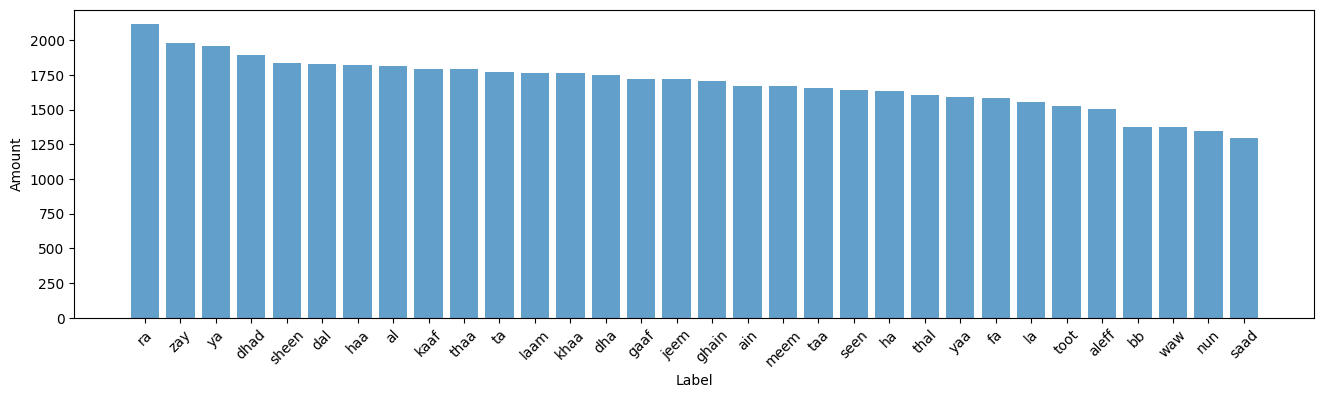

In [69]:
# plot the count of images per Label
# Get unique labels from the dataframe
Label = df['label'].unique()

# Set the size of the plot
plt.figure(figsize=(16,4))

# Create a bar chart of label counts
plt.bar(range(len(label_counts)), label_counts, alpha = .7)

# Set x-axis tick marks and labels to the unique labels
plt.xticks(range(len(label_counts)), Label, rotation = 45)

# Set x and y axis labels
plt.xlabel("Label")
plt.ylabel("Amount")

# Display the plot
plt.show()

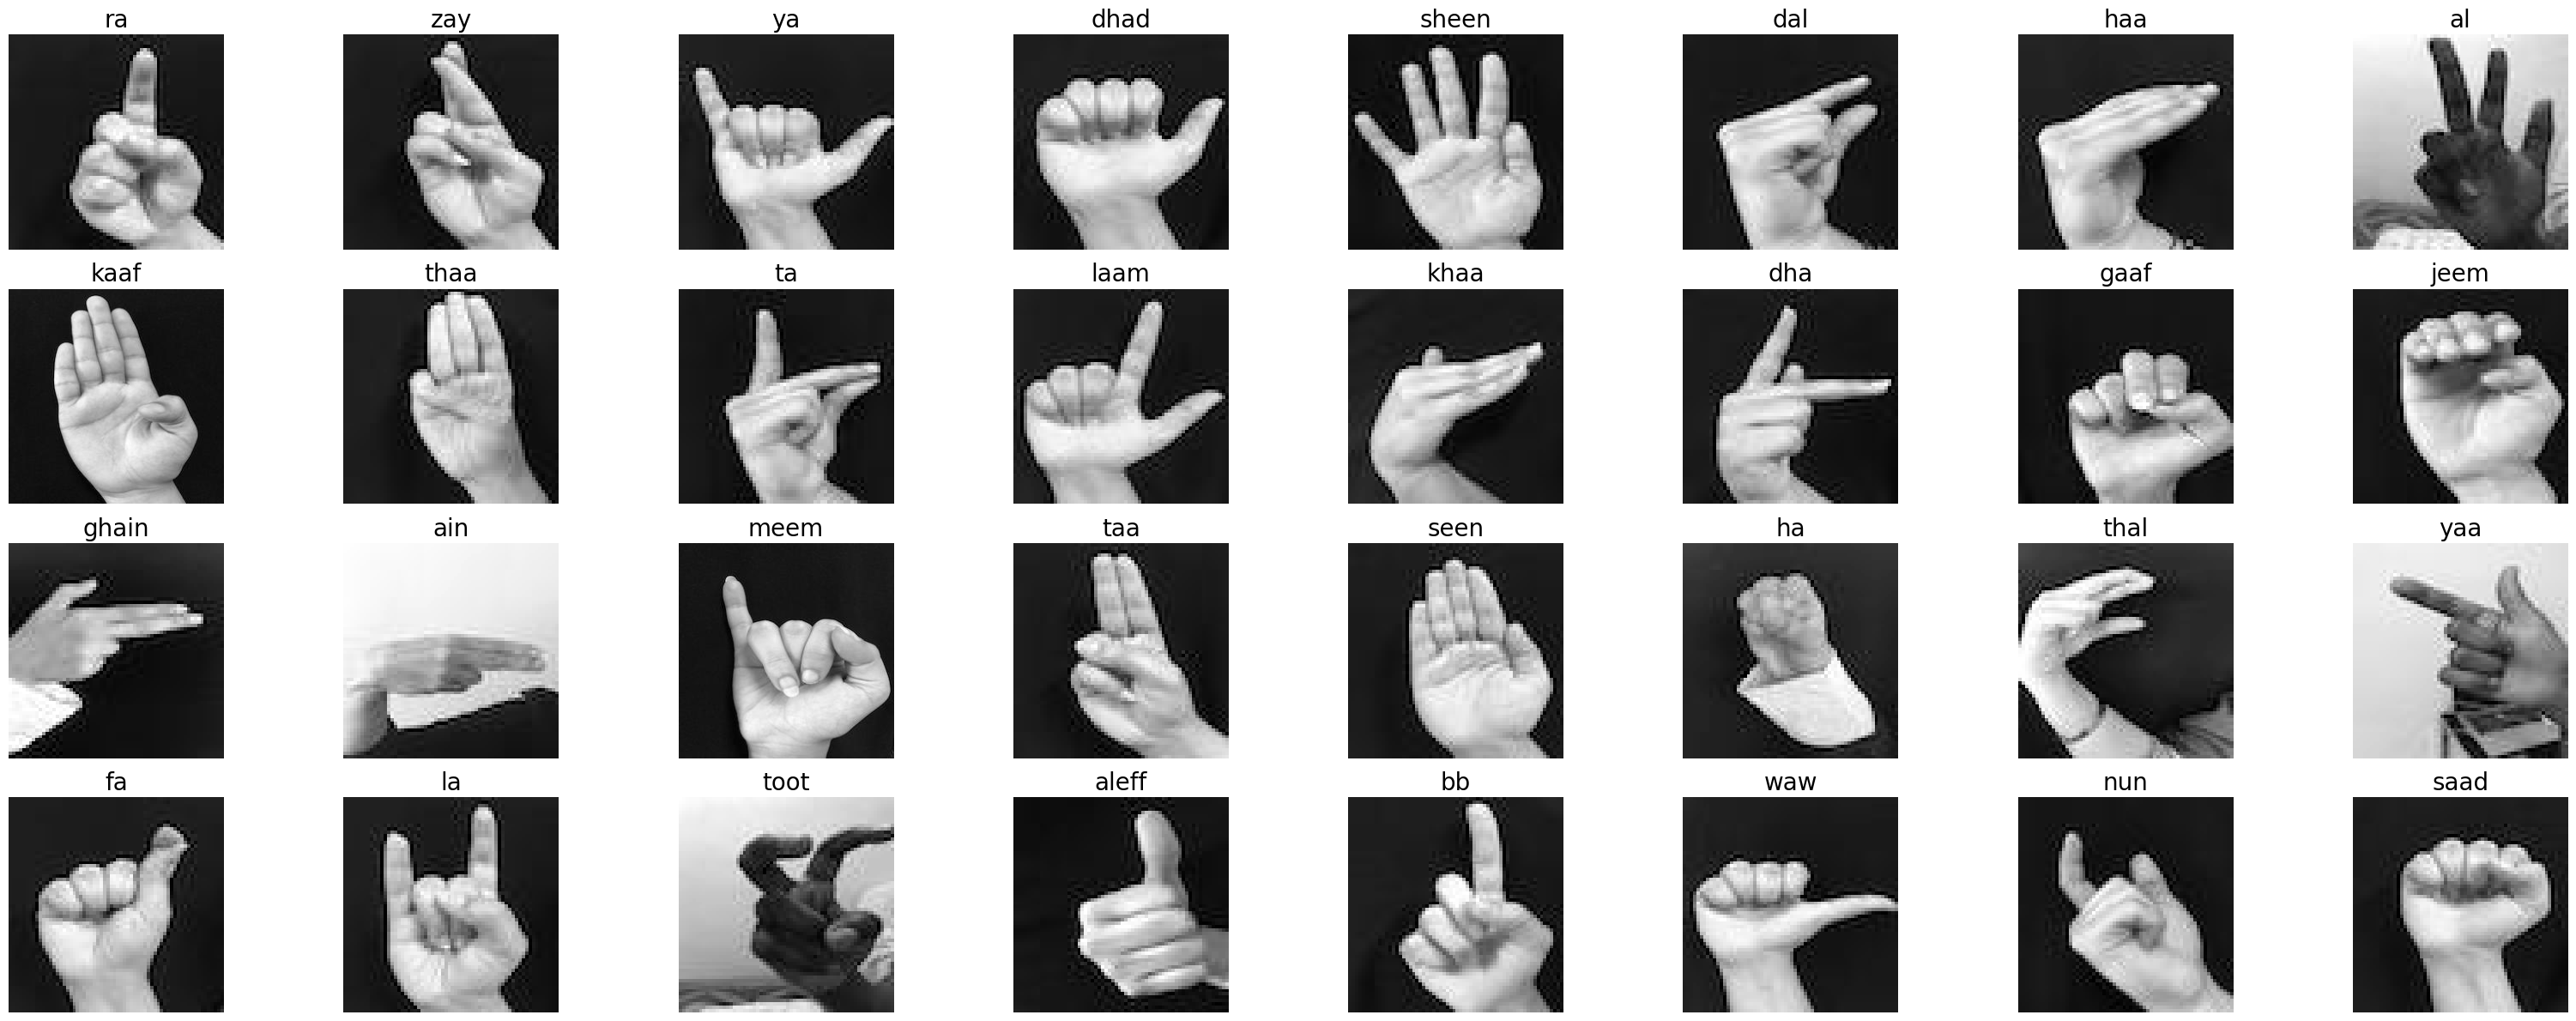

In [70]:
# Plot Examples of all signs with theri best quality
# Get one image for each label
label_to_image = {}
for label in df['label'].unique():
    label_df = df[df['label'] == label]
    variances = [np.var(np.array(image)) for image in label_df['image']]
    max_idx = np.argmax(variances)
    label_to_image[label] = label_df.iloc[max_idx]['image']

# Create a figure with subplots
fig, axs = plt.subplots(nrows=int(np.ceil(len(label_to_image) / 8)), ncols=8, figsize=(32, 12))

# Loop over each label and plot the corresponding image
for i, (label, image) in enumerate(label_to_image.items()):
    row = i // 8
    col = i % 8
    axs[row, col].imshow(image, cmap='gray')
    axs[row, col].set_title(label, fontsize=20)
    axs[row, col].axis('off')

# Adjust spacing and display the plot
fig.tight_layout()
plt.show()

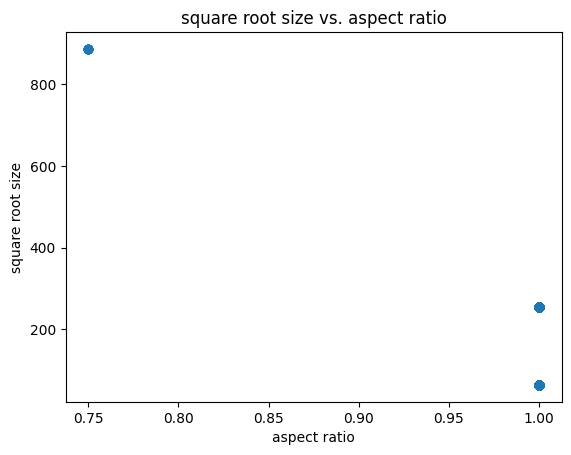

In [71]:
# plot the square root size vs aspect ratio to see the distribution of sizes
# first calculate the square root size and the aspect ratio
square_root_size = []
aspect_ratio = []
for image in df['image']:
  #size of the images in pixels
  width, height = image.size
  
  #calculate the square root size
  sqrt_size = (width * height) ** 0.5
  square_root_size.append(sqrt_size)

  #cxalculate the aspect_ration
  aspt_rt = width/height
  aspect_ratio.append(aspt_rt)

# plot the data
fig, ax = plt.subplots()
ax.scatter(aspect_ratio, square_root_size)

# add labels and a title
ax.set_xlabel("aspect ratio")
ax.set_ylabel("square root size")
ax.set_title("square root size vs. aspect ratio")

# show the plot
plt.show()

In [72]:
df['aspect_ratio'] = aspect_ratio
df['square_root_size'] = square_root_size

In [73]:
# Calculate the number of images with different aspect ratios than 1:1.
num_dif_ratio = len(np.where(df['aspect_ratio'] != 1)[0])
print(f"Number of different ratio: {num_dif_ratio}")

Number of different ratio: 10


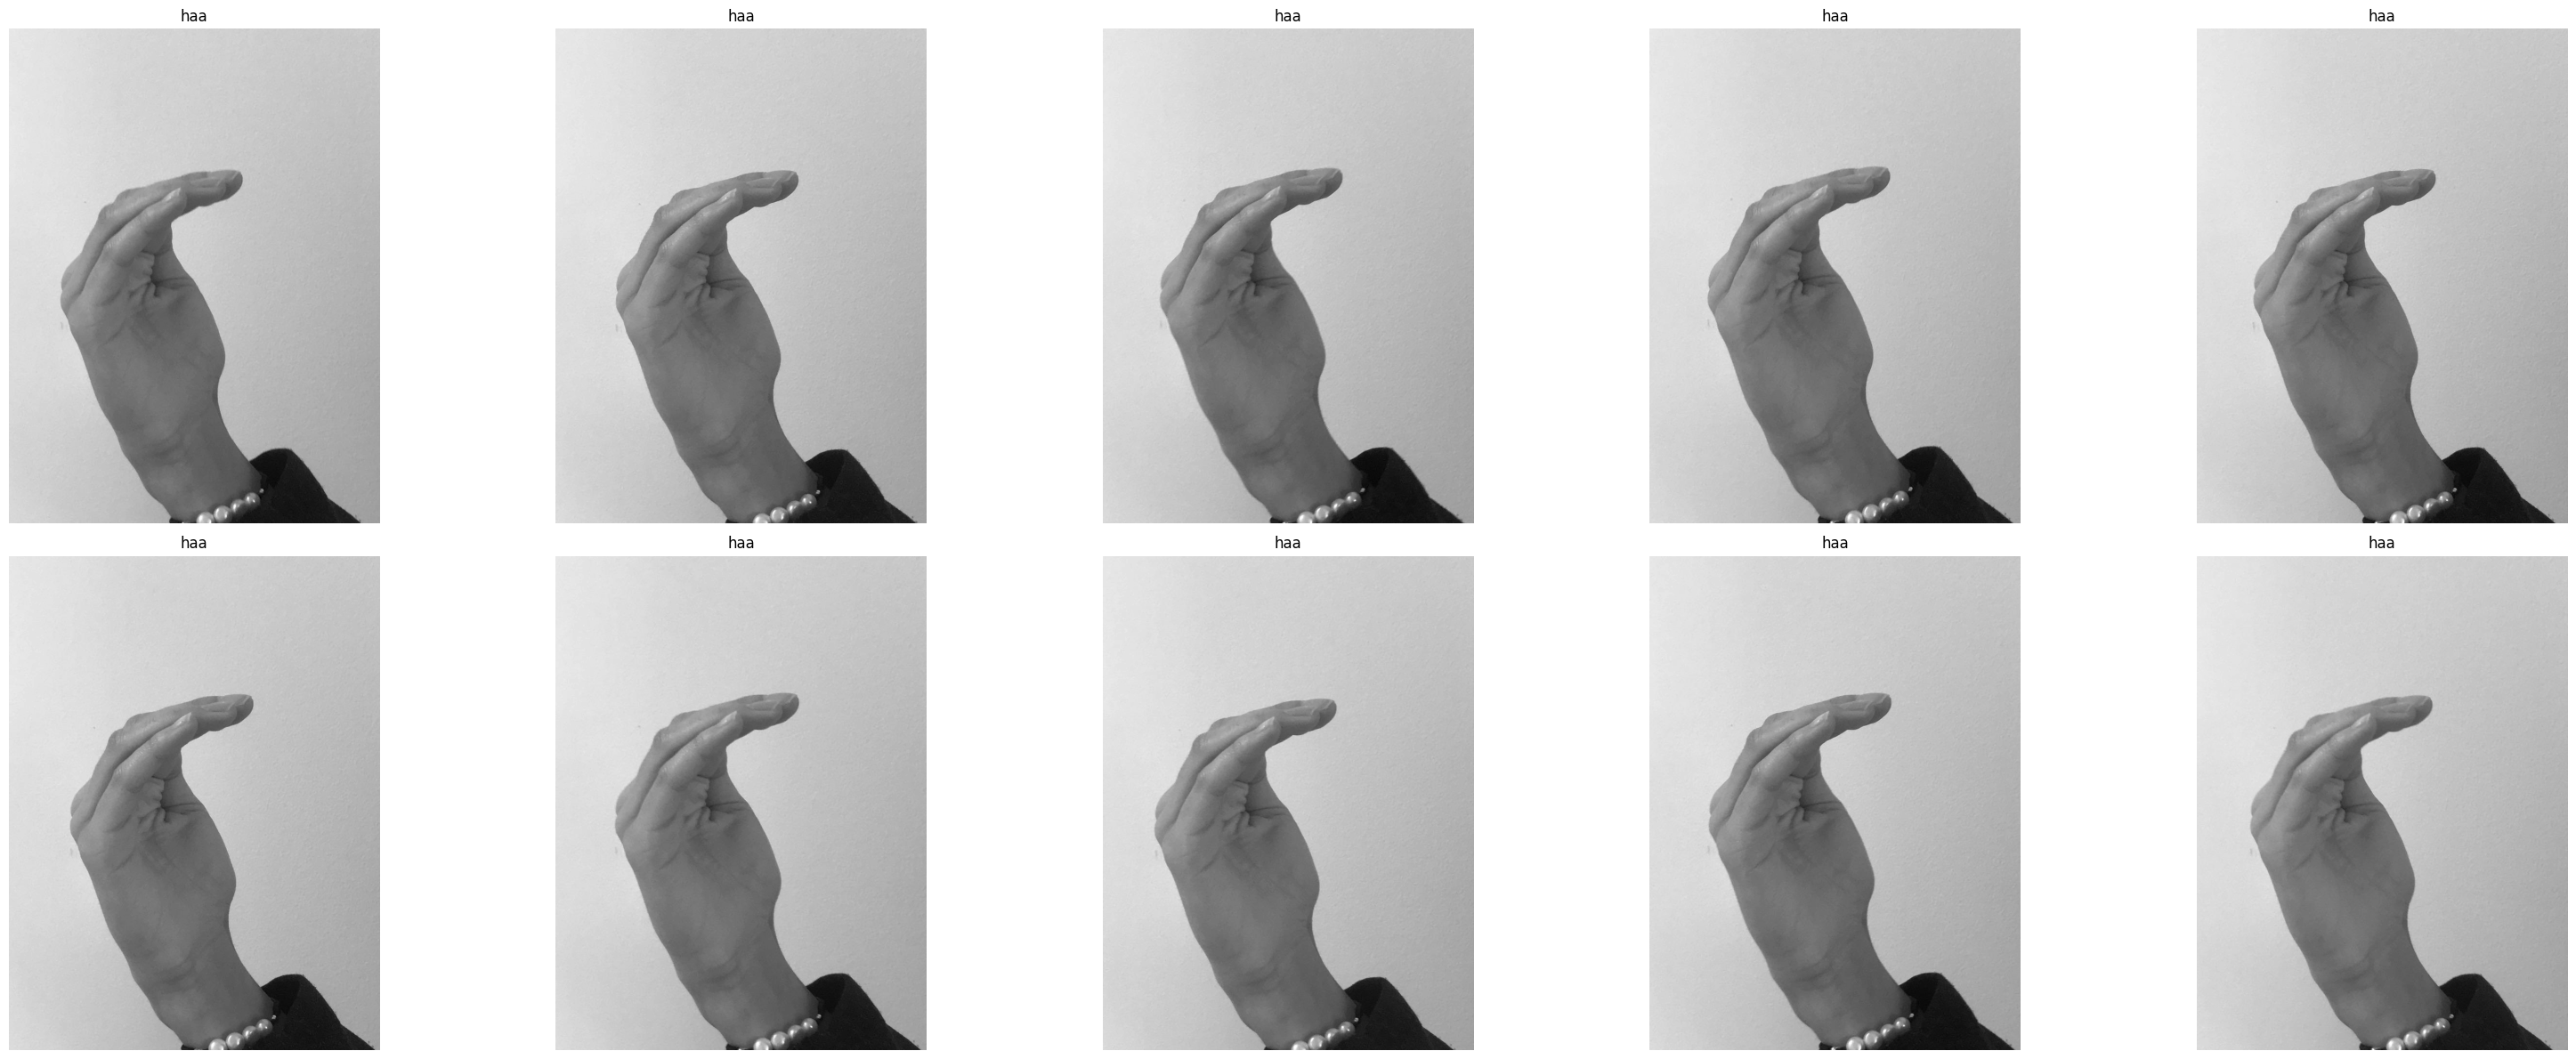

In [74]:
#reduce the dataframe to the rows that have a different aspect ratio than 1
df_asp = df.loc[df['aspect_ratio'] != 1]

# Define the number of columns in the figure
num_cols = 5

# Calculate the number of rows needed
num_rows = len(df_asp) // num_cols

# Create a new figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(32, 12))

# Flatten the axes array for ease of iteration
axes = axes.flatten()

# Loop through each image in the DataFrame and display it
for i, (_, row) in enumerate(df_asp.iterrows()):
    img = row['image']
    ax = axes[i]
    ax.imshow(img, cmap='gray')
    ax.set_title(row['label'])
    ax.axis('off')
    
# Remove any unused axes
for i in range(len(df), num_rows * num_cols):
    axes[i].axis('off')
    
plt.tight_layout()
plt.show()

In [75]:
# Find rows where the image size is not (64,64)
non_6464_rows = df[df['image'].apply(lambda x: x.size) != (64,64)]

#get the total number of pictures that are not size (64,64)
num_pics_64 = len(non_6464_rows)
num_pics = len(df)
Perc_of_whole = num_pics_64/num_pics * 100
print("Number of pictures with different size:\n")
print(num_pics_64)
print("That is", f"{Perc_of_whole:.2f}%", "of the whole dataset \n")

#split the information per category
label_counts_64 = non_6464_rows['label'].value_counts()
label_counts = df['label'].value_counts()
print("Number and Percentage of different sized pictures per Label:")
print("(The Percentage refers to the number of all pictures of that label):\n")
for label, count in label_counts_64.items():
    percentage = count/label_counts[label] * 100
    print(f"{label}: {count} ({percentage:.2f}%)")

Number of pictures with different size:

648
That is 1.20% of the whole dataset 

Number and Percentage of different sized pictures per Label:
(The Percentage refers to the number of all pictures of that label):

kaaf: 320 (18.04%)
meem: 318 (18.02%)
haa: 10 (0.66%)


In [76]:
# Color Channel Analysis
def get_channel_means(image):
    return np.mean(np.array(image))
# Initialize a list to store the mean pixel intensity of each color channel
channel_means = []

# Loop through the images in the dataset and calculate the channel means
for i in range(len(df)):
    image = df['image'][i]
    channel_means.append(get_channel_means(image))

# Convert the channel means to a numpy array and calculate the mean and standard deviation for the channel
channel_means = np.array(channel_means)
mean_intensity = np.mean(channel_means)
std_intensity = np.std(channel_means)

# Print the mean and standard deviation for the channel
print("Mean pixel intensity: {:.2f}".format(mean_intensity))
print("Standard deviation of pixel intensity: {:.2f}".format(std_intensity))

Mean pixel intensity: 164.73
Standard deviation of pixel intensity: 45.94


## Preprocessing

In [77]:
# Check for Duplicates

def get_hash(img_path):
    """
    Calculates the MD5 checksum of the input image.

    Args:
        img_path (str): The file path of the input image.

    Returns:
        str: The MD5 checksum of the image.
    """
    # Open the input image in binary mode
    with open(img_path, "rb") as f:
        # Initialize a new MD5 hash object
        img_hash = hashlib.md5()
        # Read the image data in chunks and update the hash object with each chunk
        while chunk := f.read(8192):
           img_hash.update(chunk)
    # Return the hexadecimal representation of the hash value
    return img_hash.hexdigest()

In [78]:
#Add a column to the DataFrame to store the hash values for each image in the dataset
df['hash'] = df['img_path'].apply(get_hash)

#Calculate the number of unique hash values in the dataset and identify duplicates based on the hash value
unique_values = df['hash'].nunique()
duplicates = df[df.duplicated(['hash'])]

#Print the number of duplicates found in the dataset
print("Duplicates in the Dataset based on the calculated hash value:")
print(len(duplicates), '\n')

#Print the total number of images in the dataset before dropping duplicates
print("Images in the Dataset before dropping Duplicates:")
print(len(df), '\n')

#Drop the duplicate images from the dataset based on the hash value and reset the index
df.drop_duplicates(subset=['hash'], inplace=True)
df = df.reset_index(drop=True)

#Print the total number of images in the dataset after dropping duplicates
print("Images in the Dataset after dropping Duplicates:")
print(len(df))

Duplicates in the Dataset based on the calculated hash value:
5670 

Images in the Dataset before dropping Duplicates:
54049 

Images in the Dataset after dropping Duplicates:
48379


In [79]:
# Create an empty list to store the anomaly scores for each image
anomaly_scores = []

# Loop through each image in the dataset
for i in range(len(df)):
    # Load the image
    image = df.loc[i, 'image']
    
    # Calculate the mean and standard deviation of the image
    mean = np.mean(image)
    std = np.std(image)
    
    # Calculate the anomaly score
    anomaly_score = np.abs((image - mean) / std).mean()
    anomaly_scores.append(anomaly_score)

# Add the anomaly scores as a new column to the dataframe
df['anomaly_score'] = anomaly_scores

# Print the dataframe sorted by anomaly score
print(df.sort_values(by='anomaly_score', ascending=False))

                                                img_path  \
5753   /content/MachineLearning/Dataset/ArASL_Databas...   
5934   /content/MachineLearning/Dataset/ArASL_Databas...   
6001   /content/MachineLearning/Dataset/ArASL_Databas...   
6260   /content/MachineLearning/Dataset/ArASL_Databas...   
6817   /content/MachineLearning/Dataset/ArASL_Databas...   
...                                                  ...   
28514  /content/MachineLearning/Dataset/ArASL_Databas...   
44147  /content/MachineLearning/Dataset/ArASL_Databas...   
29119  /content/MachineLearning/Dataset/ArASL_Databas...   
30141  /content/MachineLearning/Dataset/ArASL_Databas...   
7429   /content/MachineLearning/Dataset/ArASL_Databas...   

                                                   image  label  aspect_ratio  \
5753   <PIL.Image.Image image mode=L size=64x64 at 0x...  sheen           1.0   
5934   <PIL.Image.Image image mode=L size=64x64 at 0x...  sheen           1.0   
6001   <PIL.Image.Image image mode=L

In [80]:
#Filter out images with anomaly scores above 0.85
df_filtered = df.loc[df['anomaly_score'] < 0.85]

#Reset the index to start from 0
df_filtered = df_filtered.reset_index(drop=True)

#Print the number of images in the filtered dataset
print('Number of pictures in the dataset after filtering:')
print(len(df_filtered))

Number of pictures in the dataset after filtering:
38645


In [81]:
# This is a function to resize an image to a fixed size of (64,64)
def resize_image(image, size=(64, 64)):
    """Resizes an image to a specific size using PIL"""
    return image.resize(size)

# Apply the resize function to each image in the dataframe
df_filtered['image'] = df_filtered['image'].apply(resize_image)

In [82]:
# Normalization
# Rescaling the pictures to a fixed size
# This is a function to rescale the pixel values of an image
def rescale_image(image):
    return tf.keras.preprocessing.image.img_to_array(image) / 255.0

# Apply the rescaling function to all images in the DataFrame
df_filtered['image'] = df_filtered['image'].apply(rescale_image)

#### Final Analysis

In [83]:
#get the total number of pictures in the dataset
num_pics = len(df_filtered)
print("Number of pictures in the dataset after Filtering:\n")
print(num_pics, "\n")

#get the total number of pictures per category and the corresponding percentage
label_counts = df_filtered['label'].value_counts()
print("Number and Percentage of pictures per Label after Filtering:\n")
for label, count in label_counts.items():
    percentage = count/num_pics * 100
    print(f"{label}: {count} ({percentage:.2f}%)")

Number of pictures in the dataset after Filtering:

38645 

Number and Percentage of pictures per Label after Filtering:

ain: 1771 (4.58%)
ghain: 1564 (4.05%)
fa: 1464 (3.79%)
ta: 1454 (3.76%)
nun: 1342 (3.47%)
laam: 1326 (3.43%)
ra: 1321 (3.42%)
bb: 1311 (3.39%)
dal: 1308 (3.38%)
dha: 1297 (3.36%)
gaaf: 1296 (3.35%)
toot: 1281 (3.31%)
meem: 1277 (3.30%)
ha: 1274 (3.30%)
saad: 1270 (3.29%)
khaa: 1245 (3.22%)
ya: 1228 (3.18%)
haa: 1191 (3.08%)
la: 1178 (3.05%)
thal: 1177 (3.05%)
taa: 1163 (3.01%)
dhad: 1137 (2.94%)
zay: 1108 (2.87%)
jeem: 1108 (2.87%)
thaa: 1108 (2.87%)
yaa: 1063 (2.75%)
kaaf: 1029 (2.66%)
aleff: 1018 (2.63%)
sheen: 898 (2.32%)
al: 896 (2.32%)
waw: 785 (2.03%)
seen: 757 (1.96%)


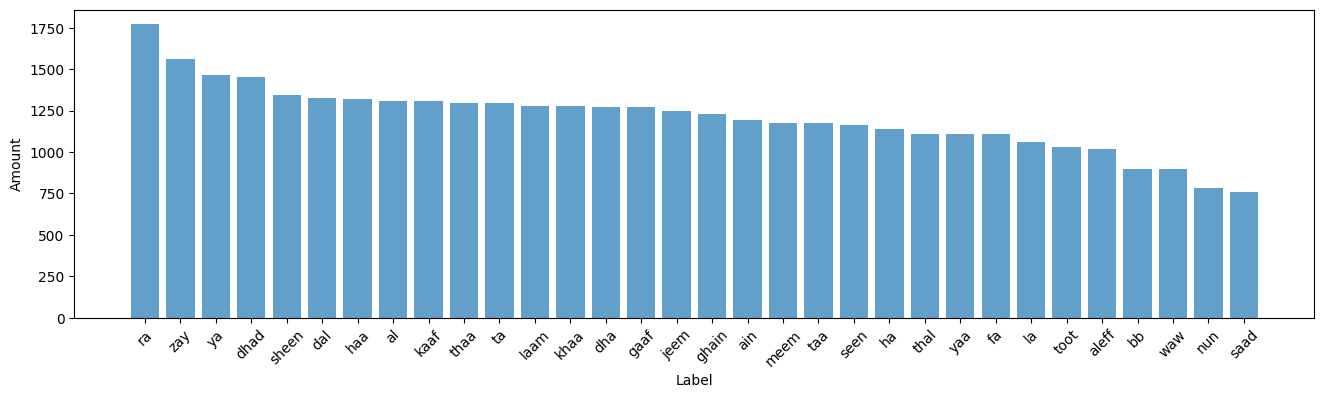

In [84]:
# plot the count of images per Label
# Get unique labels from the dataframe
Label = df_filtered['label'].unique()

# Set the size of the plot
plt.figure(figsize=(16,4))

# Create a bar chart of label counts
plt.bar(range(len(label_counts)), label_counts, alpha = .7)

# Set x-axis tick marks and labels to the unique labels
plt.xticks(range(len(label_counts)), Label, rotation = 45)

# Set x and y axis labels
plt.xlabel("Label")
plt.ylabel("Amount")

# Display the plot
plt.show()

## PCA

In [118]:
# Define the range of image transformations to apply
X = df_filtered['image']
y = df_filtered['label']

# Encode the target variable y into numerical values for modeling purposes
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Analyze the distribution of classes in the dataset
class_distribution = df_filtered.groupby('label').size()
#print('Class distribution:')
#print(class_distribution)

# Stratified split the dataset into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

# Print the number of samples in each set
#print("Number of samples in the training set:", len(X_train))
#print(len(X_train)/len(df_filtered))
#print("Number of samples in the validation set:", len(X_valid))
#print(len(X_valid)/len(df_filtered))
#print("Number of samples in the test set:", len(X_test))
#print(len(X_test)/len(df_filtered))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Generate an instance of the ImageDataGenerator class
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

# Reshape the input data to fit the model
#X_train = X_train.reshape(-1, 224, 224, 3)
#X_valid = X_valid.reshape(-1, 224, 224, 3)
#X_test = X_test.reshape(-1, 224, 224, 3)

# Generate augmented images from the training set
train_generator = datagen.flow(X_train, y_train, batch_size=32)

## Export data to CSV Files

In [97]:
# Creating dataframes from the training, testing, and validation sets
train_df = pd.DataFrame({'image': X_train, 'label': y_train}).reset_index(drop=True)
test_df = pd.DataFrame({'image': X_test, 'label': y_test}).reset_index(drop=True)
valid_df = pd.DataFrame({'image': X_valid, 'label': y_valid}).reset_index(drop=True)

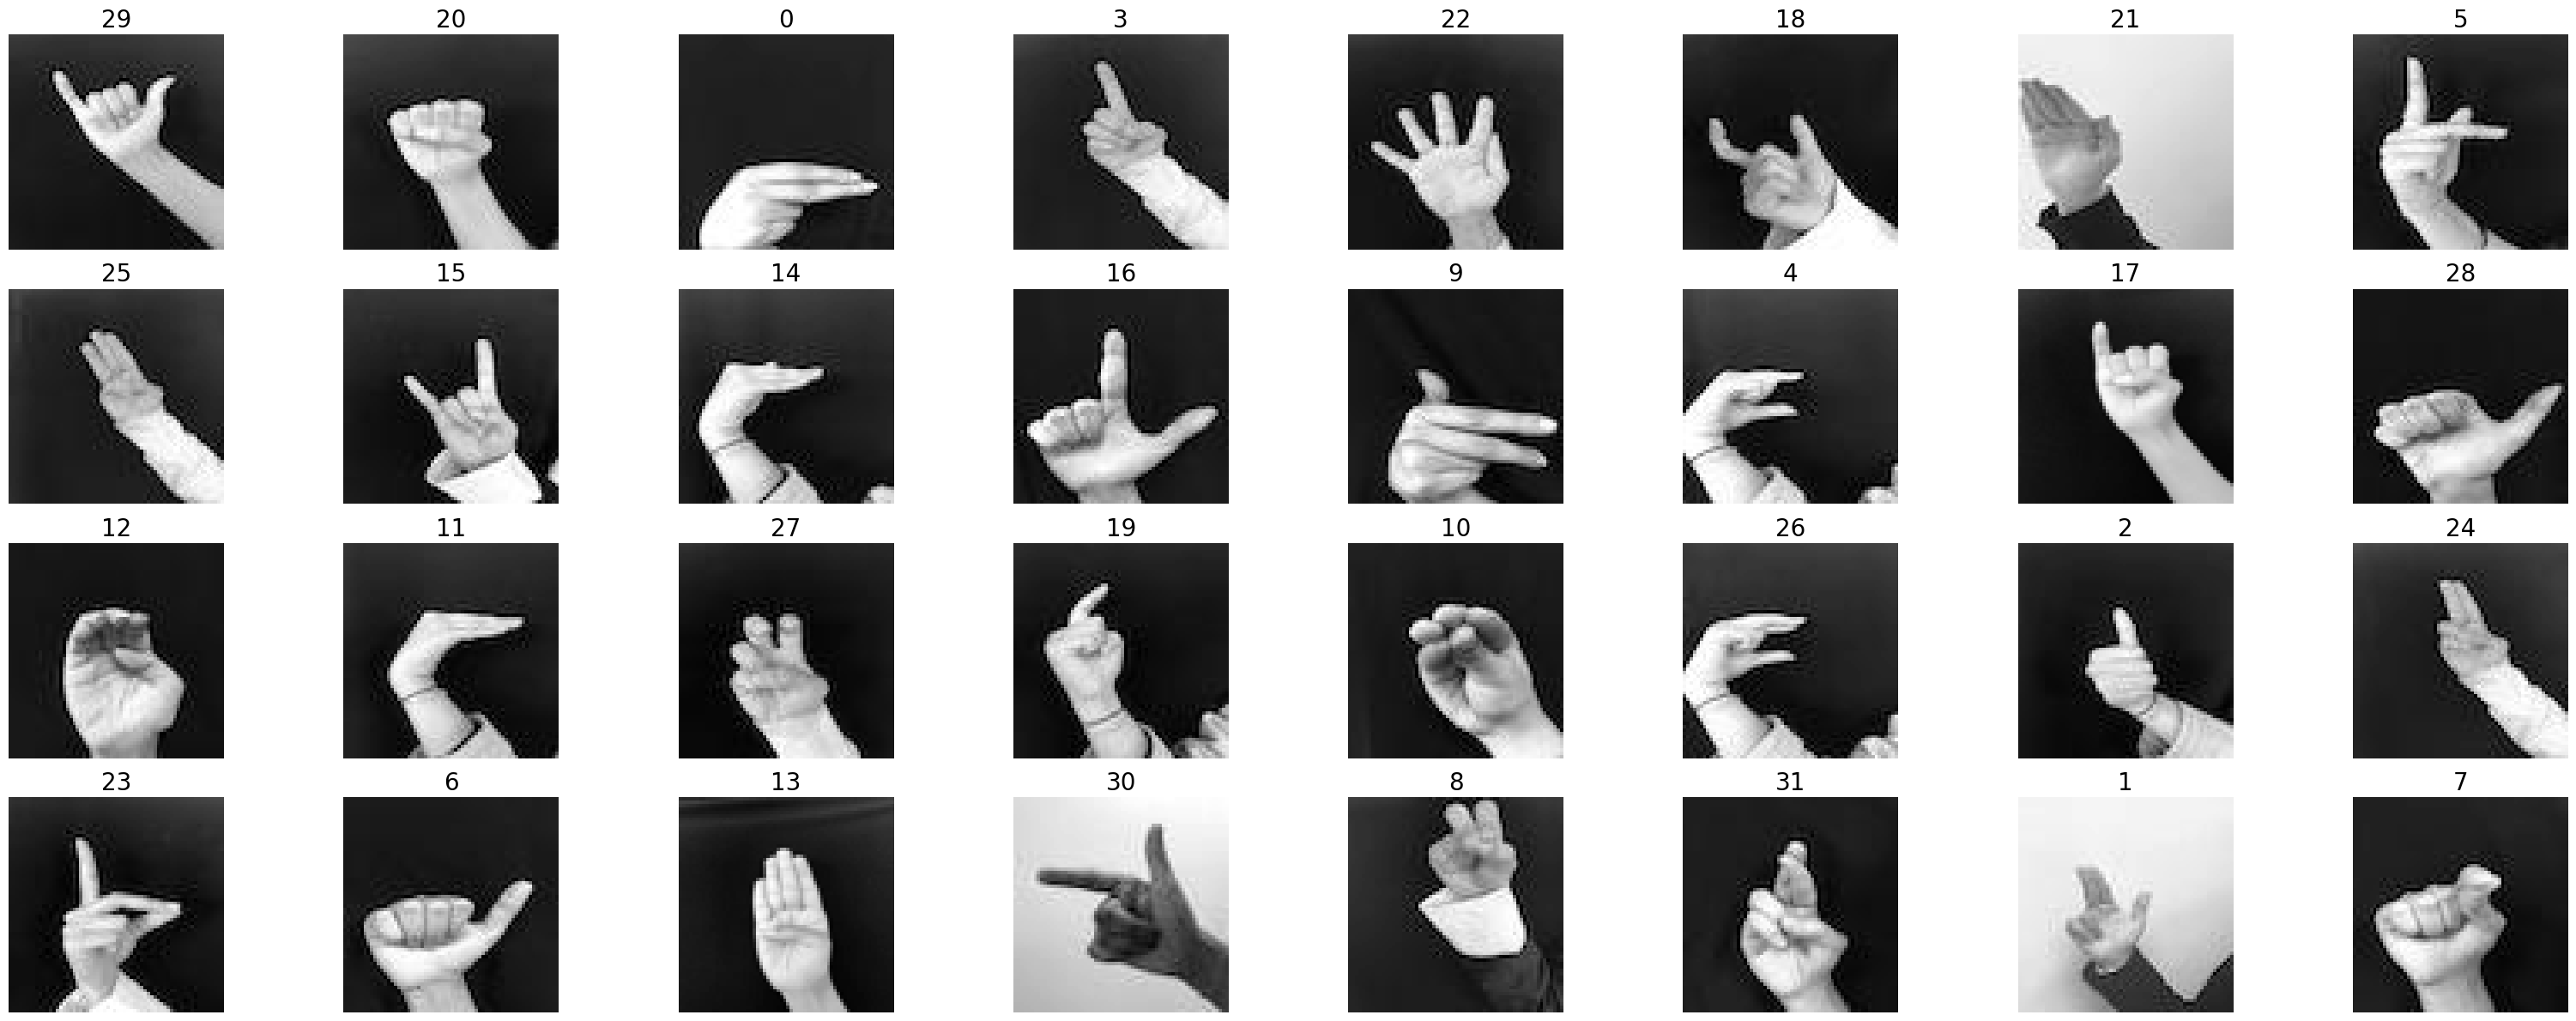

In [98]:
# Plot Examples of all signs with theri best quality
# Get one image for each label
label_to_image = {}
for label in train_df['label'].unique():
    label_df = train_df[train_df['label'] == label]
    variances = [np.var(np.array(image)) for image in label_df['image']]
    max_idx = np.argmax(variances)
    label_to_image[label] = label_df.iloc[max_idx]['image']

# Create a figure with subplots
fig, axs = plt.subplots(nrows=int(np.ceil(len(label_to_image) / 8)), ncols=8, figsize=(32, 12))

# Loop over each label and plot the corresponding image
for i, (label, image) in enumerate(label_to_image.items()):
    row = i // 8
    col = i % 8
    axs[row, col].imshow(image, cmap='gray')
    axs[row, col].set_title(label, fontsize=20)
    axs[row, col].axis('off')

# Adjust spacing and display the plot
fig.tight_layout()
plt.show()

In [121]:
train_df[:, 0]

array([array([[0.8862745 , 0.8862745 , 0.8862745 , ..., 0.9019608 , 0.9019608 ,
               0.9019608 ],
              [0.8862745 , 0.8862745 , 0.8862745 , ..., 0.9019608 , 0.9019608 ,
               0.9019608 ],
              [0.8862745 , 0.8862745 , 0.8862745 , ..., 0.9019608 , 0.9019608 ,
               0.9019608 ],
              ...,
              [0.7254902 , 0.7294118 , 0.73333335, ..., 0.77254903, 0.7764706 ,
               0.7764706 ],
              [0.7294118 , 0.73333335, 0.7372549 , ..., 0.77254903, 0.77254903,
               0.77254903],
              [0.7372549 , 0.7372549 , 0.7411765 , ..., 0.76862746, 0.77254903,
               0.77254903]], dtype=float32)                                    ,
       array([[0.87058824, 0.87058824, 0.87058824, ..., 0.9019608 , 0.9019608 ,
               0.9019608 ],
              [0.87058824, 0.87058824, 0.87058824, ..., 0.9019608 , 0.9019608 ,
               0.9019608 ],
              [0.87058824, 0.87058824, 0.87058824, ..., 0.901960

In [122]:
np.save('train_X.npy', train_df[:, 0], allow_pickle=True)
np.save('train_y.npy', train_df[:, 1], allow_pickle=True)
np.save('test_X.npy', test_df[:, 0], allow_pickle=True)
np.save('test_y.npy', test_df[:, 1], allow_pickle=True)
np.save('valid_X.npy', valid_df[:, 0], allow_pickle=True)
np.save('valid_y.npy', valid_df[:, 1], allow_pickle=True)

InvalidIndexError: ignored

In [115]:
train_X = np.load('/content/train_df.npy',  allow_pickle=True)
train_y = np.load('/content/train_df.npy',  allow_pickle=True)
test_X = np.load('/content/train_df.npy',  allow_pickle=True)
test_y = np.load('/content/train_df.npy',  allow_pickle=True)
valid_X = np.load('/content/train_df.npy',  allow_pickle=True)
train_df = np.load('/content/train_df.npy',  allow_pickle=True)

AttributeError: ignored

In [99]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from PIL import Image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from keras.utils import to_categorical
     

In [100]:

#Separate columns
X_train = X_train.apply(lambda x: np.fromstring(x,  sep=',', dtype=np.uint8))

X_test = X_test.apply(lambda x: np.fromstring(x, sep=',',dtype=np.uint8))

X_valid = X_valid.apply(lambda x: np.fromstring(x, sep=',', dtype=np.uint8))

<ipython-input-100-ee4675750e72>:2: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  X_train = X_train.apply(lambda x: np.fromstring(x,  sep=',', dtype=np.uint8))
<ipython-input-100-ee4675750e72>:4: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  X_test = X_test.apply(lambda x: np.fromstring(x, sep=',',dtype=np.uint8))
<ipython-input-100-ee4675750e72>:6: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  X_valid = X_valid.apply(lambda x: np.fromstring(x, sep=',', dtype=np.uint8))


In [ ]:
# Convert the labels to one-hot encoding
num_classes = 32
y_train = to_categorical(y_train, num_classes)
y_valid = to_categorical(y_valid, num_classes)
y_test = to_categorical(y_test, num_classes)

In [90]:
# Load packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np

# Define the input shape
input_shape = (64, 64, 1)

# Initialize the model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))

# Add the first max pooling layer
model.add(MaxPooling2D((2, 2)))

# Add the second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add the second max pooling layer
model.add(MaxPooling2D((2, 2)))

# Add the flatten layer
model.add(Flatten())

# Add the dense layer
model.add(Dense(128, activation='relu'))

# Add the dropout layer
model.add(Dropout(0.5))

# Add the output layer
model.add(Dense(32, activation='softmax'))

def lr_decay(epoch):
    return 0.01 * 0.9 ** epoch

optimizer = Adam(learning_rate=0.01)

lr_scheduler = LearningRateScheduler(lr_decay)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [92]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid))

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

ValueError: ignored